(w,b) found by gradient descent: (199.9999999999991,100.00000000000144)


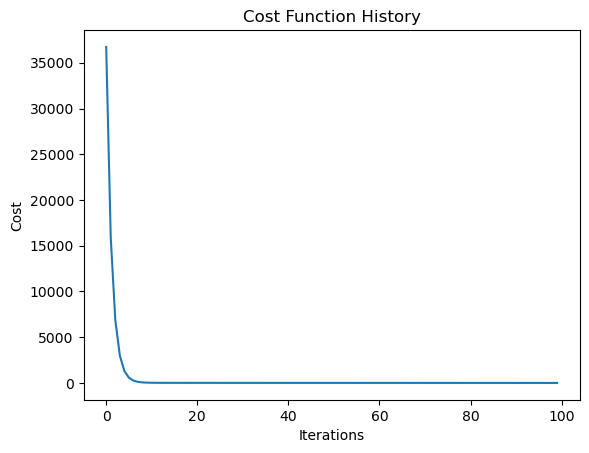

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

def compute_cost(x, y, w, b):   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

def compute_gradient(x, y, w, b):    
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
 
    return w, b, J_history, p_history

w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 0.1
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

plt.plot(J_hist[:100])
plt.title("Cost Function History")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [2]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
